# 1.  Sample Data and Boosting Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

In [2]:
from sklearn.datasets import make_gaussian_quantiles


data_1, label_1 = make_gaussian_quantiles(
    cov=2, n_samples=200, n_features=2, n_classes=2, random_state=2021
)

data_2, label_2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=2021
)

In [3]:
data = np.concatenate((data_1, data_2))
label = np.concatenate((label_1, - label_2 + 1))

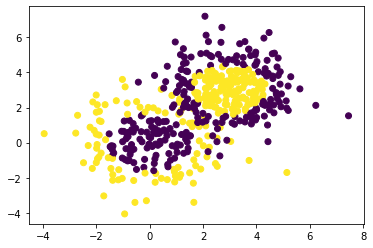

In [4]:
plt.scatter(data[:,0], data[:,1], c=label)

### 1.2 Split

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    data, label, train_size=0.7, random_state=2021)

### 1.3 Visualization Data

In [6]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 2. Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2)

### 2.1 Learning

In [8]:
tree.fit(train_data, train_label)

DecisionTreeClassifier(max_depth=2)

### 2.2 Predict

In [9]:
tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

### 2.3 Evalution

In [10]:
from sklearn.metrics import accuracy_score

tree_train_acc = accuracy_score(train_label, tree_train_pred)
tree_test_acc = accuracy_score(test_label, tree_test_pred)

In [11]:
print(f"Tree train accuray is {tree_train_acc:.4f}")
print(f"Tree test accuray is {tree_test_acc:.4f}")   

Tree train accuray is 0.7286
Tree test accuray is 0.6867


### 2.4 Visualization

In [12]:
tree_Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
tree_Z = tree_Z.reshape(xx.shape)

Text(0.5, 1.0, 'test data')

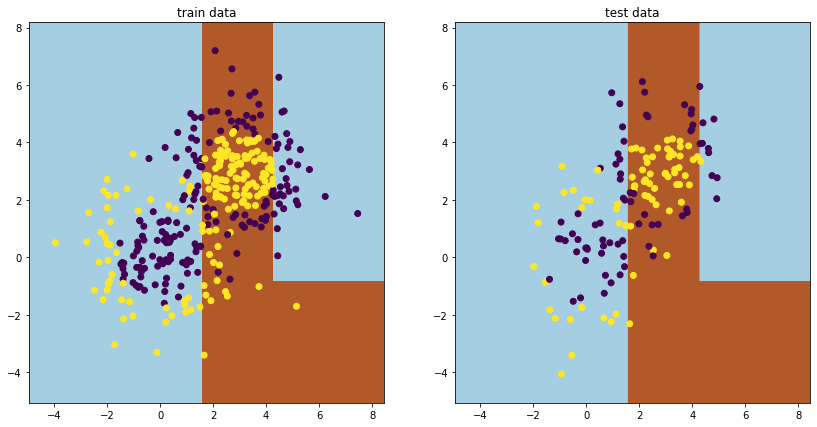

In [13]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)
plt.title("train data")

plt.subplot(122)
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)
plt.title("test data")

### 3. AdaBoost
AdaBoost는 `sklearn.ensemble`의 `AdaBoostClassifier`로 생성   
`AdaBoostClassifier`는 `base_estimator`를 선언   
가장 간단한 if else로 데이터가 분류 될 수 있도록 depth가 1인 tree로 base estimator로 생성

In [14]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

### 3.1 Predict

In [15]:
ada_boost.fit(train_data, train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1))

### 3.2 Predict

In [16]:
ada_boost_train_pred = ada_boost.predict(train_data)
ada_boost_test_pred = ada_boost.predict(test_data)

### 3.3 Evalution

In [17]:
from sklearn.metrics import accuracy_score

ada_boost_train_acc = accuracy_score(train_label, ada_boost_train_pred)
ada_boost_test_acc = accuracy_score(test_label, ada_boost_test_pred)

In [18]:
print(f"Ada Boost train accuray is {ada_boost_train_acc:.4f}")
print(f"Ada Boost test accuray is {ada_boost_test_acc:.4f}")   

Ada Boost train accuray is 0.9486
Ada Boost test accuray is 0.8600


### 3.4 Visualization

In [19]:
ada_boost_Z = ada_boost.predict(np.c_[xx.ravel(), yy.ravel()])
ada_boost_Z = ada_boost_Z.reshape(xx.shape)

Text(0.5, 1.0, 'test_data')

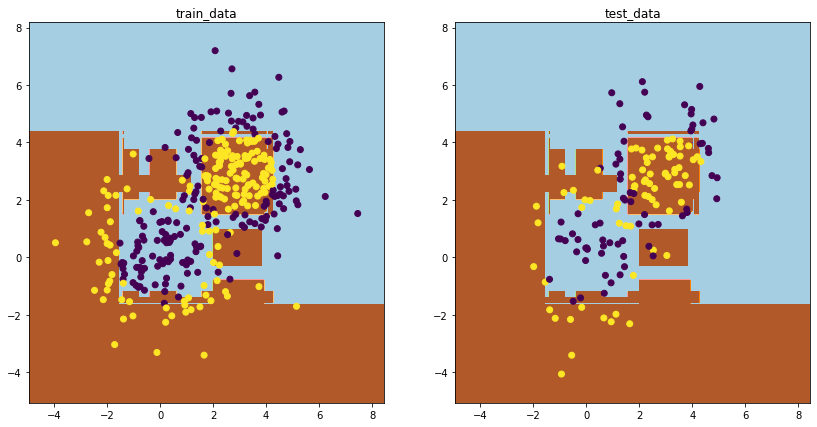

In [20]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
cs = plt.contourf(xx, yy, ada_boost_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)
plt.title("train_data")

plt.subplot(122)
cs = plt.contourf(xx, yy, ada_boost_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)
plt.title("test_data")

# 4. GradientBoost
Gradient Boost는 `sklearn.ensemble` 의 `GradientBoostingClassifier`로 생성  
radient Boost또한 간단한 if else로 만들 수 있도록 max_depth를 1로 설정

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(max_depth=1)

### 4.1 Learning

In [22]:
grad_boost.fit(train_data, train_label)

GradientBoostingClassifier(max_depth=1)

### 4.2 Predict

In [23]:
grad_boost_train_pred = grad_boost.predict(train_data)
grad_boost_test_pred = grad_boost.predict(test_data)

### 4.3 Evalution

In [24]:
from sklearn.metrics import accuracy_score

grad_boost_train_acc = accuracy_score(train_label, grad_boost_train_pred)
grad_boost_test_acc = accuracy_score(test_label, grad_boost_test_pred)

In [25]:
print(f"Gradient Boost train accuray is {grad_boost_train_acc:.4f}")
print(f"Gradient Boost test accuray is {grad_boost_test_acc:.4f}")   

Gradient Boost train accuray is 0.8886
Gradient Boost test accuray is 0.8200


### 4.4 Visualization

In [26]:
grad_boost_Z = grad_boost.predict(np.c_[xx.ravel(), yy.ravel()])
grad_boost_Z = grad_boost_Z.reshape(xx.shape)

Text(0.5, 1.0, 'test_data')

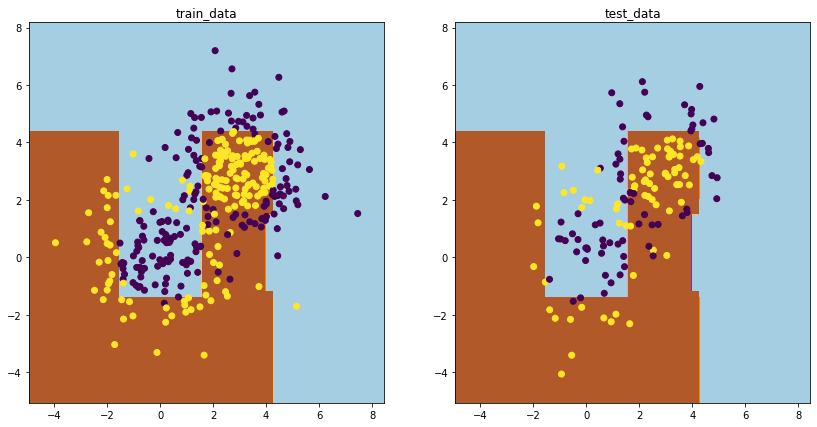

In [27]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
cs = plt.contourf(xx, yy, grad_boost_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)
plt.title("train_data")

plt.subplot(122)
cs = plt.contourf(xx, yy, grad_boost_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)
plt.title("test_data")

# 5. Summary

In [28]:
print(f"Tree test accuray is {tree_test_acc:.4f}")
print(f"Gradient Boost test accuray is {grad_boost_test_acc:.4f}")
print(f"Ada Boost test accuray is {ada_boost_test_acc:.4f}")

Tree test accuray is 0.6867
Gradient Boost test accuray is 0.8200
Ada Boost test accuray is 0.8600


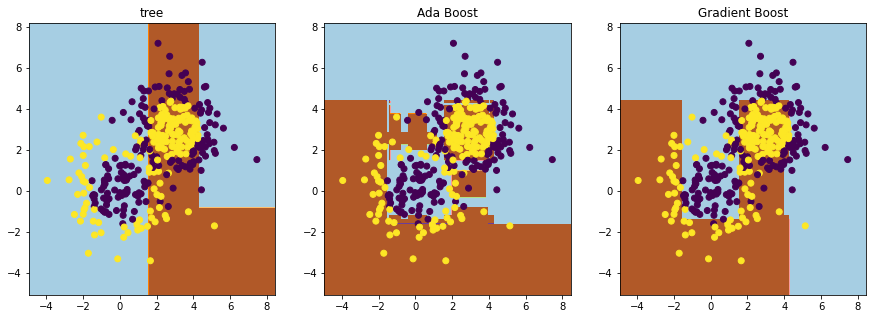

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

Z_name = [
    ("tree", tree_Z),
    ("Ada Boost", ada_boost_Z),
    ("Gradient Boost", grad_boost_Z)
]

for idx, (name, Z) in enumerate(Z_name):
    ax = axes[idx]
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    ax.scatter(train_data[:,0], train_data[:,1], c=train_label)
    ax.set_title(name)